# ETL

En este primer notebook se realizará el ETL de los datasets y un primera exploración de los datos

## steam_games

Este Dataset contiene información sobre los videojuegos. Se puede saber mas sobre sus atributos en el `Diccionario de Datos STEAM`.

In [1]:
import pandas as pd
import numpy as np
import gzip
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Extraer los datos a partir del archivo JSON comprimido con gzip.

file_path = "./Datasets/steam_games.json.gz"

data_list = []  # Lista para almacenar los objetos JSON

# Se requiere este metodo porque el archivo contiene datos anidados.
with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for line in f:
        try:
            obj = json.loads(line)
            data_list.append(obj)
        except json.JSONDecodeError:
            print(f"Error al cargar línea: {line}")

In [3]:
games_df = pd.DataFrame(data_list)
games_df.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(f"El df tiene {games_df.shape[0]} filas y {games_df.shape[1]} columnas.")

El df tiene 120445 filas y 13 columnas.


In [5]:
# Obtener el promedio de nulos en cada columna.
games_df.isnull().mean()

publisher       0.800050
genres          0.760455
app_name        0.733214
title           0.750218
url             0.733198
release_date    0.750359
tags            0.734551
reviews_url     0.733214
specs           0.738760
price           0.744630
early_access    0.733198
id              0.733214
developer       0.760588
dtype: float64

Se observa que todas las columnas tienen mas de 70% de nulos y en algunas filas todos sus valores son nulos, por lo que se eliminará dichas filas.

In [6]:
games_df = games_df.dropna(how="all").reset_index(drop=True)

In [7]:
# Quedaron aprox. 25% de las filas.
print(f"El df tiene {games_df.shape[0]} filas y {games_df.shape[1]} columnas.")

El df tiene 32135 filas y 13 columnas.


In [8]:
# El promedio de nulos bajó notablemente.
games_df.isnull().mean()

publisher       0.250568
genres          0.102163
app_name        0.000062
title           0.063793
url             0.000000
release_date    0.064322
tags            0.005072
reviews_url     0.000062
specs           0.020850
price           0.042850
early_access    0.000000
id              0.000062
developer       0.102661
dtype: float64

In [9]:
games_df.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN


In [10]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 3.2+ MB


Se seleccionarán solo algunas columnas, que sean útiles para el EDA.

In [11]:
columnas_seleccionadas = ["id", "app_name", "title", "url", "release_date", 
                          "genres", "tags", "specs"]

games_df = games_df[columnas_seleccionadas]
games_df.head(3)

,id,app_name,title,url,release_date,genres,tags,specs
0,761140,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player]
1,643980,Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla..."
2,670290,Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla..."


Vamos a empezar la exploración univariable.

### id

In [12]:
# El Dataframe tiene 32135 filas
games_df.id.isna().sum()

2

Hay 2 valores nulos, vamos a explorarlos.

In [13]:
games_df[games_df.id.isna()]

,id,app_name,title,url,release_date,genres,tags,specs
74,NaN,NaN,NaN,http://store.steampowered.com/,NaN,NaN,NaN,NaN
30961,NaN,Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Adventure]","[Action, Open World, Batman, Adventure, Stealt...","[Single-player, Steam Achievements, Steam Trad..."


La primera fila (indice 74) tiene casi todos sus valores vacios por lo que podemos eliminarla con seguridad.

La segunda fila (indice 30961) tiene el id nulo, pero podemos ver en el url que debería ser 200260 asique imputaremos este valor. Esto se confirmó en el sitio de Steam.

In [14]:
games_df.drop(74, axis=0, inplace=True)
games_df.loc[30961, "id"] = "200260"
games_df.reset_index(drop=True, inplace=True)

In [15]:
games_df.id.duplicated().sum() # Hay 2 duplicados que se dropean
games_df.drop_duplicates(subset=["id"], inplace=True)
games_df.reset_index(drop=True, inplace=True)

In [16]:
# games_df tiene ahora 32132 filas.
games_df.id.nunique() 

# El número de ids únicos coincide con el número de filas por lo que puede
# servir como clave primaria y para conectar con otras tablas.

32132

In [17]:
# Convertir "id" a número para ahorrar espacio de almacenamiento. 
games_df["id"] = games_df["id"].astype("int32")

### app_name y title

Las columnas `app_name` y `title` se ven bastante similares. Vamos a explorar las diferencias.

In [18]:
(games_df["app_name"] != games_df["title"]).sum()

2604

In [19]:
# Filtrar filas sin nulos en app_name o title.
games_df2 = games_df[(games_df.app_name.notna()) & (games_df.title.notna())] 

# Hacer una mascara cuando app_name sea diferente a title.
diferentes = (games_df2["app_name"] != games_df2["title"])

# Obtener los indices True de diferentes.
indices_true = diferentes.index[diferentes]
indices_true

# Visualizar los primeros resultados después de aplicar los filtros.
games_df2.loc[indices_true, ["app_name", "title"]].sample(10)

,app_name,title
31818,Sam & Max 205: What&#146;s New Beelzebub?,Sam &amp; Max 205: What&amp;#146;s New Beelzebub?
19583,Toricky - OST by Hiroki Kikuta & Dale North,Toricky - OST by Hiroki Kikuta &amp; Dale North
15086,Hanako: Honor & Blade,Hanako: Honor &amp; Blade
15042,Rocket League® – Fast & Furious™ '99 Nissan Sk...,Rocket League® – Fast &amp; Furious™ '99 Nissa...
3448,Fantasy Grounds - D&D Warlock Class Pack,Fantasy Grounds - D&amp;D Warlock Class Pack
31019,Superbrothers: Sword & Sworcery EP,Superbrothers: Sword &amp; Sworcery EP
10942,Fantasy Grounds - B07: Beauty & Blood (5E),Fantasy Grounds - B07: Beauty &amp; Blood (5E)
10839,Slice&Dice,Slice&amp;Dice
8059,Virtual Battlemap DLC - Castles & Chill,Virtual Battlemap DLC - Castles &amp; Chill
22495,Short Bob & Golden Short Bob,Short Bob &amp; Golden Short Bob


Las columnas `app_name` y `title` son casi idénticas. Las mayores diferencias parecer estar en la mala lectura del caracter `&` en `title`, y algunas otras menores, por lo que se eliminará la columna `title`.

In [20]:
games_df.drop("title", axis=1, inplace=True)

Vamos a analizar los valores faltantes en app_name.

In [21]:
games_df.app_name.isna().sum() # 1 valor faltante
games_df[games_df.app_name.isna()]

,id,app_name,url,release_date,genres,tags,specs
2579,317160,NaN,http://store.steampowered.com/app/317160/_/,2014-08-26,"[Action, Indie]","[Action, Indie]","[Single-player, Game demo]"


A partir del url podemos saber que el `app_name` es "Duet" por lo que imputamos ese valor.

In [22]:
games_df.loc[2579, "app_name"] = "Duet"

In [23]:
games_df.app_name.duplicated().sum() # 38 duplicados
games_df[games_df['app_name'].duplicated(keep=False)].sort_values(by="app_name").head(4)

,id,app_name,url,release_date,genres,tags,specs
30545,216173,AirMech® Soundtrack,http://store.steampowered.com/app/216173/AirMe...,2012-11-13,"[Action, Free to Play, Indie, Strategy]","[Strategy, Action, Free to Play, Indie]","[Single-player, Multi-player, Co-op, Downloada..."
18846,599520,AirMech® Soundtrack,http://store.steampowered.com/app/599520/AirMe...,NaN,NaN,"[Strategy, Action, Indie]","[Single-player, Multi-player, Online Multi-Pla..."
30177,219441,Aliens: Colonial Marines - Reconnaissance Pack,http://store.steampowered.com/app/219441/Alien...,2013-05-07,[Action],[Action],"[Single-player, Multi-player, Co-op, Downloada..."
30176,224850,Aliens: Colonial Marines - Reconnaissance Pack,http://store.steampowered.com/app/224850/Alien...,2013-05-07,[Action],[Action],"[Single-player, Multi-player, Co-op, Downloada..."


En el análisis de duplicados en esta columna, se observan 38 duplicados. Sin embargo, analizando los url en la web de Steam, se verifica que son productos distintos con algunas diferencias por lo que se opta por conservar todos los resultados.

### url

In [24]:
games_df.url.isna().sum()

0

In [25]:
games_df.url.duplicated().sum()

0

La columna `url` no contiene valores faltantes ni duplicados por lo que no requiere mayor exploración.

### release_date

La fecha de lanzamiento (`release_date`) debe castearse al formato datetime. Esto se hace con la función `pd.to_datetime` con `errors=raise`.

Luego de encontrar varios strings que no pueden ser casteados a fecha, se escribe un bloque try-except para ver cuantos registros tienen problemas, y cuál es el string, para ver si es un problema de formato que pueda ser resuelto con el parámetro `format`.

In [26]:
errores = 0

for fecha_str in games_df['release_date']:
    try:
        pd.to_datetime(fecha_str)
    except ValueError as v:
        errores += 1
        print(v)

print(f"Errores de conversión: {errores}")

Unknown datetime string format, unable to parse: Soon.., at position 0
Unknown datetime string format, unable to parse: Beta测试已开启, at position 0


Unknown datetime string format, unable to parse: Coming Soon, at position 0
Unknown datetime string format, unable to parse: Q2 2017, at position 0
Unknown datetime string format, unable to parse: Coming Soon, at position 0
Unknown datetime string format, unable to parse: TBA, at position 0
Unknown datetime string format, unable to parse: When it's done, at position 0
Unknown datetime string format, unable to parse: coming soon, at position 0
Unknown datetime string format, unable to parse: Q2 2018, at position 0
Unknown datetime string format, unable to parse: TBA, at position 0
Unknown datetime string format, unable to parse: Winter 2017, at position 0
Unknown datetime string format, unable to parse: soon, at position 0
Out of bounds nanosecond timestamp: 14 July, at position 0
Unknown datetime string format, unable to parse: Summer 2017, at position 0
Unknown datetime string format, unable to parse: Summer 2017, at position 0
Unknown datetime string format, unable to parse: Coming S

/var/folders/zh/9nwz8r2n7jgcph8k9gcsvvwc0000gn/T/ipykernel_1391/2242160098.py:5: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(fecha_str)


Se puede ver que hay valores que no contienen ningún número por lo que será imposible castearlos a fecha. Se los identificará y reemplazará por valores nulos.

In [27]:
# Crear máscara de campos que contengan números.
mascara = games_df.release_date.str.contains(r'\d')

# Crear máscara de campos que no contengan números.
mascara_negada = [not valor for valor in mascara]

fechas_sin_numeros = games_df[mascara_negada]

fechas_sin_numeros.head(2)

,id,app_name,url,release_date,genres,tags,specs
10,768570,Uncanny Islands,http://store.steampowered.com/app/768570/Uncan...,Soon..,"[Action, Indie, Simulation, Early Access]","[Early Access, Action, Indie, Simulation, Surv...",[Single-player]
44,714020,Idle Adventure,http://store.steampowered.com/app/714020/Idle_...,Beta测试已开启,"[Adventure, Free to Play, RPG, Early Access]","[Early Access, Free to Play, Adventure, RPG]","[MMO, Steam Achievements]"


In [28]:
games_df.loc[fechas_sin_numeros.index, "release_date"] = np.nan

Volvemos a correr el bloque try-except.

In [29]:
errores = 0

for fecha_str in games_df['release_date']:
    try:
        pd.to_datetime(fecha_str)
    except ValueError as v:
        errores += 1
        print(v)

print(f"Errores de conversión: {errores}")

Unknown datetime string format, unable to parse: Q2 2017, at position 0
Unknown datetime string format, unable to parse: Q2 2018, at position 0
Unknown datetime string format, unable to parse: Winter 2017, at position 0
Out of bounds nanosecond timestamp: 14 July, at position 0
Unknown datetime string format, unable to parse: Summer 2017, at position 0
Unknown datetime string format, unable to parse: Summer 2017, at position 0
Unknown datetime string format, unable to parse: Spring 2018, at position 0
Unknown datetime string format, unable to parse: Winter 2018, at position 0
Unknown datetime string format, unable to parse: Winter 2017, at position 0
Unknown datetime string format, unable to parse: Fall 2017, at position 0
Unknown datetime string format, unable to parse: Summer 2017, at position 0
Unknown datetime string format, unable to parse: Q1 2018, at position 0
Unknown datetime string format, unable to parse: Январь 2018, at position 0
Unknown datetime string format, unable to p

/var/folders/zh/9nwz8r2n7jgcph8k9gcsvvwc0000gn/T/ipykernel_1391/2242160098.py:5: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(fecha_str)


Si bien para estos valores tampoco podremos convertirlos a fecha, podemos extraer el año de lanzamiento, que luego nos servirá para los endpoints de la API.

In [30]:
# Utilizar una expresión regular para encontrar años (4 dígitos)
patron_anio = r'(\b\d{4}\b)'

# Aplicar la expresión regular con str.extract()
games_df['year'] = games_df['release_date'].str.extract(patron_anio)

Finalmente, podemos castear `release_date` a datetime, usando `format="coerce"` para que los errores pasen como valores nulos.

In [31]:
games_df["release_date"] = pd.to_datetime(games_df["release_date"], 
                                          format="ISO8601", errors="coerce")

In [32]:
# Verificar los valores faltantes
games_df.release_date.isna().mean()

0.07185982820863936

El porcentaje de valores nulos en esta columna es bajo (7% aprox.) por lo que no se tomará ninguna otra medida, salvo que mas adelante resulte necesaria para el modelo de ML.

### year

`year` quedó como tipo objeto por lo que debemos castearlo a un tipo numérico. En este caso al tener NaNs no podremos convertirlo a int por lo que lo convertiremos a float. No se opta por eliminar los NaNs ya que representan aprox. un 6% de las filas y por la naturaleza de la columna tampoco tiene sentido imputarlos.

In [33]:
games_df['year'] = pd.to_numeric(games_df['year'], errors='coerce')

In [34]:
games_df.year.isna().mean() # Hay aprox. 6% de valores nulos

0.06753392256940122

In [35]:
# Describir la columna year
games_df.year.describe()

count    29962.000000
mean      2014.769842
std          3.504130
min       1970.000000
25%       2014.000000
50%       2016.000000
75%       2017.000000
max       2021.000000
Name: year, dtype: float64

In [36]:
print(f"El número de años únicos es {games_df.year.nunique()}.")

El número de años únicos es 43.


Vamos a analizar como se distribuyen los juegos según el año de lanzamiento.

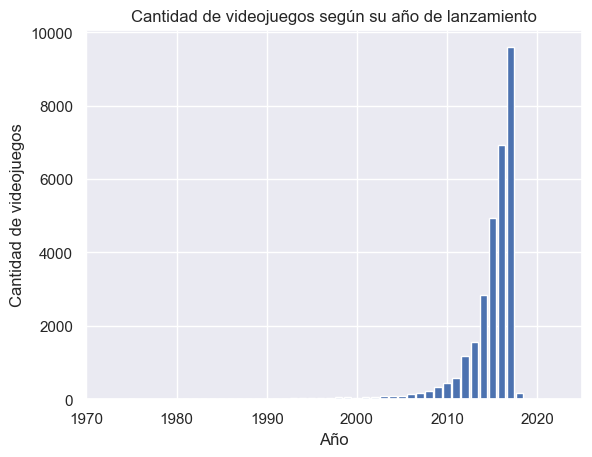

In [37]:
# Agrupar la cantidad de videojuegos según su año de lanzamiento
games_by_year = (games_df.groupby("year").id.count())

# Hacer un gráfico de barras de games_by_year
plt.bar(games_by_year.index, games_by_year.values)

plt.xlabel("Año")
plt.ylabel("Cantidad de videojuegos")
plt.title("Cantidad de videojuegos según su año de lanzamiento")
plt.xlim(1970, 2025);

Se observa un aumento exponencial del número de videojuegos lanzados al mercado desde 1970 hasta 2017. Luego cae sustancialmente hasta el 2021, pero esto es mas probable que se deba a como se recolectó la información que a un cambio en la tendencia.

### genres

La columna genres está formada por un conjunto de géneros. Veremos cuáles son las combinaciones más habituales.

In [38]:
games_df['genres_temp'] = games_df['genres'].dropna().apply(tuple)

games_df['genres_temp'].value_counts()[:10]

genres_temp
(Action,)                     1879
(Action, Indie)               1650
(Simulation,)                 1396
(Casual, Simulation)          1359
(Action, Adventure, Indie)    1082
(Strategy,)                   1056
(Adventure, Indie)            1007
(Indie, RPG, Strategy)         945
(Casual, Indie)                899
(Action, Adventure)            761
Name: count, dtype: int64

Entre las combinaciones más habituales, se repiten algunos generos como  "Action", "Indie", "Simulation", "Casual" y "Strategy".

In [39]:
games_df.drop(columns=["genres_temp"], inplace=True)

Las columnas genres, tags y specs están formadas por varias etiquetas por lo que haremos una función para separarlas en columnas individuales aplicando one-hot encoding.

Es de hacer notar que los valores nulos se reemplazarán por un string vacío, para no generar nuevas columnas, lo que debe ser tenido en cuenta a la hora de hacer el sistema de recomendación.

In [40]:
from sklearn.preprocessing import MultiLabelBinarizer

def separar_columna_multilabel(df, columna):
    # Reemplazar los valores nulos con un string vacío.
    df[columna].fillna(value="", inplace=True)

    # Crear una instancia de MultiLabelBinarizer.
    mlb = MultiLabelBinarizer()

    # Aplicar one-hot encoding a la columna y agregar un prefijo personalizado.
    encoded_columns = pd.DataFrame(mlb.fit_transform(df[columna]), columns=mlb.classes_)
    encoded_columns.columns = [f'{columna}_{col}' for col in encoded_columns.columns]
    
    # Imprimir los nombres de las columnas generadas.
    print(encoded_columns.columns)

    return encoded_columns

In [41]:
# Llamar a la función, asignar el resultado a encoded_genres y modificar df.
encoded_genres = separar_columna_multilabel(games_df, 'genres')

# Combinar el DataFrame original con el DataFrame codificado.
games_df = pd.concat([games_df, encoded_genres], axis=1)
games_df.head(3)

Index(['genres_Accounting', 'genres_Action', 'genres_Adventure',
       'genres_Animation &amp; Modeling', 'genres_Audio Production',
       'genres_Casual', 'genres_Design &amp; Illustration',
       'genres_Early Access', 'genres_Education', 'genres_Free to Play',
       'genres_Indie', 'genres_Massively Multiplayer', 'genres_Photo Editing',
       'genres_RPG', 'genres_Racing', 'genres_Simulation',
       'genres_Software Training', 'genres_Sports', 'genres_Strategy',
       'genres_Utilities', 'genres_Video Production', 'genres_Web Publishing'],
      dtype='object')


,id,app_name,url,release_date,genres,tags,specs,year,genres_Accounting,genres_Action,...,genres_Photo Editing,genres_RPG,genres_Racing,genres_Simulation,genres_Software Training,genres_Sports,genres_Strategy,genres_Utilities,genres_Video Production,genres_Web Publishing
0,761140,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],2018.0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,643980,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",2018.0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,670290,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",2017.0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [42]:
# Renombrar algunas columnas para mejorar la prolijidad
games_df.rename(
    columns={'genres_Animation &amp; Modeling': 'genres_Animation & Modeling',
             'genres_Design &amp; Illustration': 'genres_Design & Illustration'},
             inplace=True)

Analizaremos ahora la distribución de videojuegos según genero.

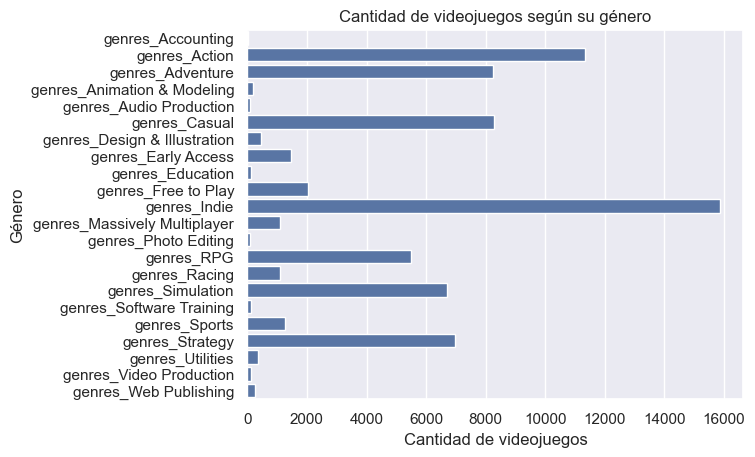

In [43]:
games_by_genre = games_df.loc[:, "genres_Accounting":"genres_Web Publishing"].sum()

# Utiliza el DataFrame df para crear el gráfico
sns.barplot(x=games_by_genre.values, y=games_by_genre.index)

# Puedes personalizar el gráfico, como agregar etiquetas a los ejes
plt.xlabel("Cantidad de videojuegos")
plt.ylabel("Género")
plt.title("Cantidad de videojuegos según su género");

Si bien "Action" en el primer lugar entre los juegos que contenían solo esa etiqueta, "Indie" es el genero que mas aparece, considerando todas sus combinaciones. Los siguen en cercanos tercer y cuarto lugar "Casual" y "Adventure".

### tags

Esta columna hace referencia a etiquetas del juego. Vemos las combinaciones más habituales de tags.

In [44]:
games_df['tags_temp'] = games_df['tags'].dropna().apply(tuple)

games_df['tags_temp'].value_counts()[:10]

tags_temp
(Casual, Simulation)          1292
(Action,)                     1105
(Simulation,)                 1085
(Strategy, RPG, Indie)         632
(Strategy,)                    625
(Action, Indie)                508
(Action, Adventure)            364
(Indie, Casual)                339
(Action, Adventure, Indie)     338
(Adventure, Indie)             288
Name: count, dtype: int64

Entre las combinaciones más habituales, se repiten algunos tags similares a los de la columna genres.

In [45]:
games_df.drop(columns=["tags_temp"], inplace=True)

In [46]:
# Llamar a la función, asignar el resultado a encoded_tags y modificar df.
encoded_tags = separar_columna_multilabel(games_df, 'tags')

# Combinar el DataFrame original con el DataFrame codificado.
games_df = pd.concat([games_df, encoded_tags], axis=1)
games_df.head(3)

Index(['tags_1980s', 'tags_1990's', 'tags_2.5D', 'tags_2D', 'tags_2D Fighter',
       'tags_360 Video', 'tags_3D Platformer', 'tags_3D Vision',
       'tags_4 Player Local', 'tags_4X',
       ...
       'tags_Warhammer 40K', 'tags_Web Publishing', 'tags_Werewolves',
       'tags_Western', 'tags_Word Game', 'tags_World War I',
       'tags_World War II', 'tags_Wrestling', 'tags_Zombies', 'tags_e-sports'],
      dtype='object', length=339)


,id,app_name,url,release_date,genres,tags,specs,year,genres_Accounting,genres_Action,...,tags_Warhammer 40K,tags_Web Publishing,tags_Werewolves,tags_Western,tags_Word Game,tags_World War I,tags_World War II,tags_Wrestling,tags_Zombies,tags_e-sports
0,761140,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],2018.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,643980,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",2018.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,670290,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",2017.0,0,0,...,0,0,0,0,0,0,0,0,0,0


Analizaremos ahora la distribución de videojuegos según tag. Al haber 339 tags, solo graficaremos las primeras 20 para poder tener una idea mejor de las mas comunes.

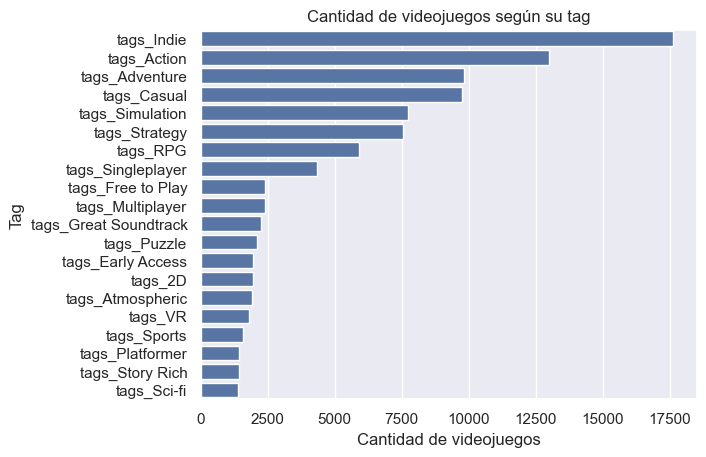

In [47]:
games_by_tag = games_df.loc[:, "tags_1980s":"tags_e-sports"].sum()
games_by_tag = games_by_tag.sort_values(ascending=False)[:20]


# Utiliza el DataFrame df para crear el gráfico
sns.barplot(x=games_by_tag.values, y=games_by_tag.index)

# Puedes personalizar el gráfico, como agregar etiquetas a los ejes
plt.xlabel("Cantidad de videojuegos")
plt.ylabel("Tag")
plt.title("Cantidad de videojuegos según su tag");

La tendencia es similar a la columna genres. "Indie" en primer lugar, "Action" segunda y "Adventure" y "Casual" cercanas en el tercer y cuarto lugar. Esto podría indicar una fuerte asociación entre las columnas genres y tags, aunque es de hacer notar que hay 22 géneros y 339 tags, por lo que vale la pena conservar ambos atributos, a pesar de cierta redundancia.

### specs

Esta columna hace referencia a especificaciones del juego. Vemos las combinaciones más habituales.

In [48]:
games_df['specs_temp'] = games_df['specs'].dropna().apply(tuple)

games_df['specs_temp'].value_counts()[:10]

specs_temp
(Single-player,)                                                                                                                                                    2794
(Single-player, Downloadable Content)                                                                                                                               1204
(Single-player, Shared/Split Screen, Downloadable Content, Steam Achievements, Steam Trading Cards, Partial Controller Support, Steam Cloud, Steam Leaderboards)    1015
(Single-player, Steam Achievements)                                                                                                                                  824
(Multi-player, Co-op, Cross-Platform Multiplayer, Downloadable Content)                                                                                              756
(Single-player, Steam Achievements, Steam Trading Cards)                                                                                        

Entre las combinaciones mas habituales están "Single-Player" y otras referidas a la plataforma Steam ("Steam Achievements", "Steam Trading Cards", etc.).

In [49]:
games_df.drop(columns=["specs_temp"], inplace=True)

In [50]:
# Llamar a la función, asignar el resultado a encoded_specs y modificar df.
encoded_specs = separar_columna_multilabel(games_df, 'specs')

# Combinar el DabtaFrame original con el DataFrame codificado.
games_df = pd.concat([games_df, encoded_specs], axis=1)
games_df.head(3)

Index(['specs_Captions available', 'specs_Co-op', 'specs_Commentary available',
       'specs_Cross-Platform Multiplayer', 'specs_Downloadable Content',
       'specs_Full controller support', 'specs_Game demo', 'specs_Gamepad',
       'specs_HTC Vive', 'specs_In-App Purchases', 'specs_Includes Source SDK',
       'specs_Includes level editor', 'specs_Keyboard / Mouse',
       'specs_Local Co-op', 'specs_Local Multi-Player', 'specs_MMO',
       'specs_Mods', 'specs_Mods (require HL1)', 'specs_Mods (require HL2)',
       'specs_Multi-player', 'specs_Oculus Rift', 'specs_Online Co-op',
       'specs_Online Multi-Player', 'specs_Partial Controller Support',
       'specs_Room-Scale', 'specs_Seated', 'specs_Shared/Split Screen',
       'specs_Single-player', 'specs_Standing', 'specs_Stats',
       'specs_Steam Achievements', 'specs_Steam Cloud',
       'specs_Steam Leaderboards', 'specs_Steam Trading Cards',
       'specs_Steam Turn Notifications', 'specs_Steam Workshop',
       'specs_Ste

,id,app_name,url,release_date,genres,tags,specs,year,genres_Accounting,genres_Action,...,specs_Steam Achievements,specs_Steam Cloud,specs_Steam Leaderboards,specs_Steam Trading Cards,specs_Steam Turn Notifications,specs_Steam Workshop,specs_SteamVR Collectibles,specs_Tracked Motion Controllers,specs_Valve Anti-Cheat enabled,specs_Windows Mixed Reality
0,761140,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],2018.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,643980,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",2018.0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,670290,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",2017.0,0,0,...,0,0,0,0,0,0,0,0,0,0


Analizaremos ahora la distribución de videojuegos según spec. Al haber 40 specs, solo graficaremos las primeras 20 para poder tener una idea mejor de las mas comunes.

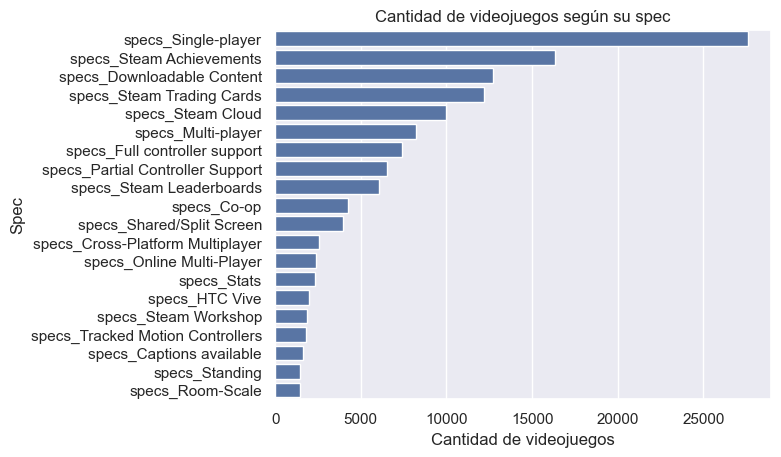

In [51]:
games_by_spec = games_df.loc[:, "specs_Captions available":"specs_Windows Mixed Reality"].sum()
games_by_spec = games_by_spec.sort_values(ascending=False)[:20]


# Utiliza el DataFrame df para crear el gráfico
sns.barplot(x=games_by_spec.values, y=games_by_spec.index)

# Puedes personalizar el gráfico, como agregar etiquetas a los ejes
plt.xlabel("Cantidad de videojuegos")
plt.ylabel("Spec")
plt.title("Cantidad de videojuegos según su spec");

El spec más repetido es "Single-Player", seguido de "Steam Achievements" y "Downloadable content".

### Carga del DataFrame procesado

Habiendo finalizado esta etapa del EDA, se seleccionarán aquellas columnas relevantes para la API y los modelos de machine learning y se guardará en un archivo .csv

Usaremos las columnas "genres", "tags" y "specs" para el sistema de recomendación, por lo que aquellos registros que no tengan información en ninguna de estas 3, no serán útiles en nuestro sistema y deben ser eliminadas.

In [52]:
# Obtener cuantos registros tienen estas 3 columnas vacias (string "").
((games_df.genres == "") & (games_df.tags == "") & (games_df.specs == "")).sum()

7

Solo 7 registros no tienen datos en ninguna de estas 3 columnas por lo que procedemos a eliminarlas.

In [53]:
vacios = ((games_df.genres == "") & (games_df.tags == "") & (games_df.specs == ""))

# Obtener los indices True de vacios.
indices_true = vacios.index[vacios]
indices_true

Index([5372, 9559, 21333, 21334, 21335, 23324, 27736], dtype='int64')

In [54]:
games_df.drop(indices_true, inplace=True)
games_df.reset_index(drop=True, inplace=True)

Eliminaremos las columnas que no sean necesarias.

In [55]:
games_df.drop(["url", "release_date"], axis=1,
              inplace=True)

In [56]:
games_df.iloc[:, :10].isna().sum() 
# La única columna que queda con valores nulos es year, con 2170 nulos.
# genres, tags y specs tienen registros con strings vacios

id                                0
app_name                          0
genres                            0
tags                              0
specs                             0
year                           2170
genres_Accounting                 0
genres_Action                     0
genres_Adventure                  0
genres_Animation & Modeling       0
dtype: int64

In [57]:
# Crear un DataFrame temporal para poder evaluar duplicados.
games_df_temp = games_df.drop(columns=["genres", "tags", "specs"], axis=1)

# No hay duplicados.
print(f"Número de duplicados: {games_df_temp.duplicated().sum()}.")

# Borrar el DataFrame temporal para ahorrar memoria.
del games_df_temp

Número de duplicados: 0.


In [58]:
print(f"El df tiene {games_df.shape[0]} filas y {games_df.shape[1]} columnas.")

El df tiene 32125 filas y 407 columnas.


In [59]:
games_df.head()

,id,app_name,genres,tags,specs,year,genres_Accounting,genres_Action,genres_Adventure,genres_Animation & Modeling,...,specs_Steam Achievements,specs_Steam Cloud,specs_Steam Leaderboards,specs_Steam Trading Cards,specs_Steam Turn Notifications,specs_Steam Workshop,specs_SteamVR Collectibles,specs_Tracked Motion Controllers,specs_Valve Anti-Cheat enabled,specs_Windows Mixed Reality
0,761140,Lost Summoner Kitty,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],2018.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,643980,Ironbound,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",2018.0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,670290,Real Pool 3D - Poolians,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",2017.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,767400,弹炸人2222,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",[Single-player],2017.0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,773570,Log Challenge,,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",NaN,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
# Guardar el DataFrame como .csv.
games_df.to_csv('./Datasets/steam_games_procesado.csv', index=False)

## user_reviews

Este dataset contiene reviews de los usuarios. Por la forma en la que están anidados los datos, y los errores obtenidos al tratar de cargar el archivo, es necesario definir una nueva función a continuación.

In [2]:
# Definir una función "leer_json_gzip()" que lee los archivos json comprimidos 
# con gzip y devuelve una lista de diccionarios Python.
def leer_json_gzip(nombre_archivo):

    # Abrimos el archivo en modo de lectura y decodificar su contenido.
    with gzip.open(nombre_archivo, 'rt', encoding='utf-8') as archivo:

        # Recorremos el contenido del archivo y evaluamos cada línea como 
        # una expresión Python.
        # El resultado de la evaluación es un diccionario Python.
        return [ast.literal_eval(line.strip()) for line in archivo]

In [62]:
reviews_data = leer_json_gzip('./Datasets/user_reviews.json.gz')
reviews_df = pd.DataFrame(reviews_data)
reviews_df.head(5)

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [63]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


Se obtiene un DataFrame con 3 columnas y sin valores nulos.

In [64]:
print(f"user_id únicos: {reviews_df.user_id.nunique()}.")
print(f"user_url únicos: {reviews_df.user_url.nunique()}.")
print(f"total usuarios: {reviews_df.shape[0]}.")
print(f"usuarios duplicados: {reviews_df.duplicated(subset='user_id').sum()}.")

user_id únicos: 25485.
user_url únicos: 25485.
total usuarios: 25799.
usuarios duplicados: 314.


Vemos que hay 314 usuarios duplicados. Podría suceder que el usuario aparezca mas de una vez, pero los reviews correspondan a videojuegos diferentes, por lo que no correspondería eliminar estos registros. Para poder comparar las 3 filas, necesitamos desanidar las reviews de la columna reviews.

In [65]:
# Pasar a una fila nueva cada uno de los diccionarios anidados.
reviews = reviews_df.reviews.explode()

# Unir el resultado a "reviews_df" al aplicar "pd.Series" a cada elemento en
# "reviews" para convertir los diccionarios en columnas.
reviews_df = reviews_df.join(reviews.apply(pd.Series))

# Eliminar la columna original "reviews".
reviews_df.drop('reviews', axis=1, inplace=True)

In [66]:
reviews_df.head(3)

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN


In [67]:
# Evaluar los duplicados
reviews_df.duplicated().sum()

874

Hay 874 duplicados por lo que se procede a eliminarlos.

In [68]:
reviews_df.drop_duplicates(inplace=True, ignore_index=True)

Volvemos a contar los usuarios.

In [69]:
print(f"user_id únicos: {reviews_df.user_id.nunique()}.")
print(f"user_url únicos: {reviews_df.user_url.nunique()}.")
print(f"total usuarios: {reviews_df.shape[0]}.")
print(f"usuarios duplicados: {reviews_df.duplicated(subset='user_id').sum()}.")

user_id únicos: 25485.
user_url únicos: 25485.
total usuarios: 58459.
usuarios duplicados: 32974.


El número de usuarios únicos permanece constante. Aquí "total usuarios" pasa a representar el número de registros, el cuál aumento por el uso de la función `pd.explode()` sobre "reviews". Aquí ya no corresponde eliminar "usuarios duplicados" porque cada usuario puede hacer reviews para mas de 1 juego.

Ahora vamos a quedarnos solo con las columnas que serán útiles para el análisis y los pasos posteriores.

In [70]:
columnas_seleccionadas = ["user_id", "posted", "item_id", "recommend", "review"]

reviews_df = reviews_df[columnas_seleccionadas]

In [71]:
reviews_df.head()

,user_id,posted,item_id,recommend,review
0,76561197970982479,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
1,76561197970982479,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
2,76561197970982479,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...
4,js41637,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...


In [72]:
print(f"El df tiene {reviews_df.shape[0]} filas y {reviews_df.shape[1]} columnas.")

El df tiene 58459 filas y 5 columnas.


Revisemos los valores nulos.

In [73]:
reviews_df.isna().sum()

user_id       0
posted       28
item_id      28
recommend    28
review       28
dtype: int64

Hay 28 valores faltantes en las 4 columnas que provienen de la columna original "reviews". Al ser tan pocos en relación al número de registros y no servir para responder a las consultas a la API, vamos a eliminarlos.

In [74]:
reviews_df.dropna(subset=['posted', 'item_id', 'recommend', 'review'], 
                  inplace=True, ignore_index = True)

In [75]:
print(f"El df tiene {reviews_df.shape[0]} filas y {reviews_df.shape[1]} columnas.")

El df tiene 58431 filas y 5 columnas.


In [76]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    58431 non-null  object
 1   posted     58431 non-null  object
 2   item_id    58431 non-null  object
 3   recommend  58431 non-null  object
 4   review     58431 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB


Estamos en condiciones de empezar el análisis univariable.

### user_id

In [77]:
print(f"El número de usuarios únicos es {reviews_df.user_id.nunique()}.")

El número de usuarios únicos es 25458.


Podemos analizar la cantidad de reviews de cada uno, para ver la homogeneidad o heterogeneidad del grupo.

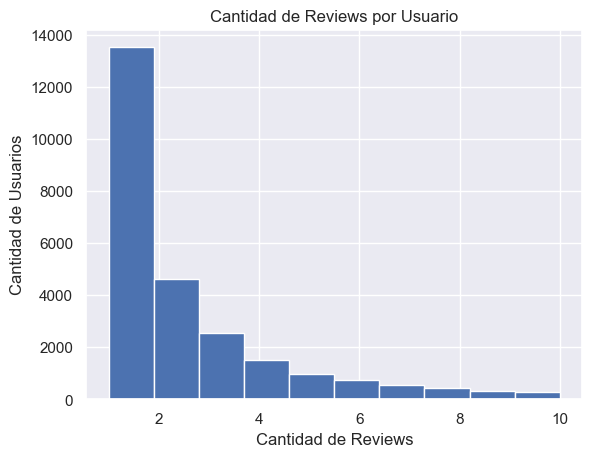

In [78]:
reviews_by_user = reviews_df.user_id.value_counts()

plt.hist(reviews_by_user)  

plt.xlabel('Cantidad de Reviews')
plt.ylabel('Cantidad de Usuarios')
plt.title('Cantidad de Reviews por Usuario');

Vemos que la gran mayoría de los usuarios ha hecho 1 sola review y que este número va disminuyendo hasta llega a 10. Este sesgo hacia la derecha es favorable en el sentido de no serán pocos usuarios quienes afecten las estadísticas por haber hecho mas reviews que los demás.

### posted

Esta es la fecha en la que fue hecha la review. De aquí solo nos interesa el año por lo que procederemos a extraerlo.

In [79]:
# Definir una expresión regular para buscar un año de cuatro dígitos
regex_pattern = r'(\d{4})'

# Usa str.extract para extraer el año y crea una nueva columna 'year'
reviews_df['review_year'] = reviews_df['posted'].str.extract(regex_pattern)

# Convierte la columna 'year' en valores numéricos (opcional)
reviews_df['review_year'] = pd.to_numeric(reviews_df['review_year'], 
                                          errors='coerce')


In [80]:
reviews_df.review_year.isna().mean()

0.16999537916516919

Hay casi un 17% de fechas para los cuales no se pudo extraer el año por no estar presente. Por ahora se dejarán el el DataFrame y en el caso de necesitarlo se lidiará con ellos. Se eliminará la columna "posted" que ya no es necesaria.

In [81]:
reviews_df.drop("posted", axis=1, inplace=True)

### review_year

Sabemos que hay casi un 17% de datos faltantes respecto al año de publicación. Para los datos no nulos, analicemos el número de reviews según año de publicación.

In [82]:
reviews_df.review_year.describe()

count    48498.000000
mean      2014.148150
std          0.842611
min       2010.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: review_year, dtype: float64

In [83]:
reviews_df.groupby("review_year").user_id.count()

review_year
2010.0       66
2011.0      530
2012.0     1201
2013.0     6713
2014.0    21834
2015.0    18154
Name: user_id, dtype: int64

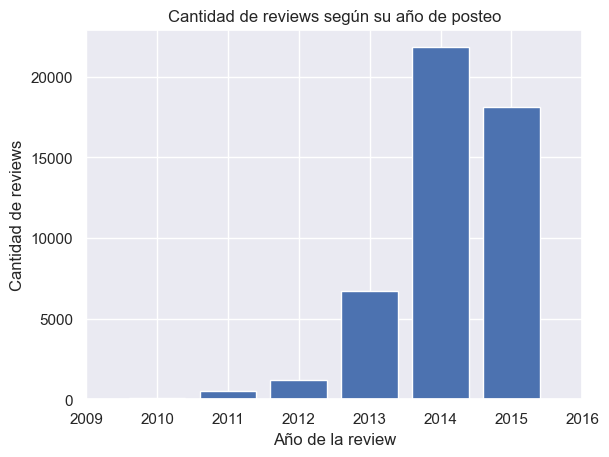

In [84]:
# Agrupar la cantidad de reviews según su año de posteo
reviews_by_year = (reviews_df.groupby("review_year").user_id.count())

# Hacer un gráfico de barras de reviews_by_year
plt.bar(reviews_by_year.index, reviews_by_year.values)

plt.xlabel("Año de la review")
plt.ylabel("Cantidad de reviews")
plt.title("Cantidad de reviews según su año de posteo")
plt.xlim(2009, 2016);

Podemos ver que el número de reviews aumenta desde 2010 hasta alcanzar su máximo en 2014 y luego desciende un poco en 2015.

### item_id

In [85]:
print(f"El número de videojuegos únicos en el dataframe es" 
      f" {reviews_df.item_id.nunique()}.")

El número de videojuegos únicos en el dataframe es 3682.


In [86]:
reviews_df.item_id.value_counts()

item_id
730       3708
440       3694
4000      1704
570       1544
218620    1113
          ... 
33100        1
312720       1
449980       1
32770        1
431510       1
Name: count, Length: 3682, dtype: int64

Podemos ver que hay videojuegos, como el de item_id 730 con muchas reviews mientras que otros solo tienen una review.

In [87]:
reviews_df["item_id"] = reviews_df["item_id"].astype("int32")

### recommend

Esta columna indica si el usuario recomienda o no el videojuego y debe ser de tipo booleano.

In [88]:
reviews_df["recommend"] = reviews_df["recommend"].astype("bool")

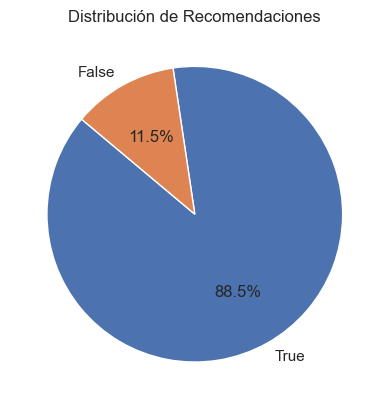

In [89]:
# Contar la cantidad de valores True y False en la columna 'recommend'
recommend_counts = reviews_df['recommend'].value_counts()

# Crear un pie chart 
plt.pie(recommend_counts, labels=recommend_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Recomendaciones');

El 88.5% de las reviews recomiendan el videojuego mientras que el 11.5% restante no lo hacen.

### review

Esta es la review en sí y sobre la misma haremos análisis de sentimiento con NLP para crear la columna `sentiment_analysis`, que tomará los valores:
* `0` si es malo.
* `1` si es neutral.
* `2` si es positivo.

También debería tomar el valor `1` en caso de la columna "review" tuviera un valor nulo. Previamente se eliminaron los 28 datos nulos, porque además de ser pocos, iban acompañados de nulos en las otras columnas derivadas de "reviews" ("posted", "item_id" y "recommend") y su presencia no modifica las consultas a la API.

In [90]:
from textblob import TextBlob

# Función para realizar análisis de sentimientos
def analizar_sentimiento(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 2
    elif analysis.sentiment.polarity < 0:
        return 0
    else:
        return 1

reviews_df["sentiment_analysis"] = reviews_df["review"].apply(analizar_sentimiento)


In [91]:
reviews_df.head()

,user_id,item_id,recommend,review,review_year,sentiment_analysis
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011.0,2
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011.0,2
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011.0,2
3,js41637,251610,True,I know what you think when you see this title ...,2014.0,2
4,js41637,227300,True,For a simple (it's actually not all that simpl...,2013.0,0


Ahora podemos eliminar la columna "review".

In [92]:
reviews_df.drop("review", axis=1, inplace=True)

### Carga del DataFrame procesado

Habiendo finalizado esta etapa del EDA, se seleccionarán aquellas columnas relevantes para la API y los modelos de machine learning y se guardará en un archivo .csv

In [93]:
reviews_df.head(2)

,user_id,item_id,recommend,review_year,sentiment_analysis
0,76561197970982479,1250,True,2011.0,2
1,76561197970982479,22200,True,2011.0,2


In [94]:
reviews_df.info() # Información del DataFrame que se guardará.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             58431 non-null  object 
 1   item_id             58431 non-null  int32  
 2   recommend           58431 non-null  bool   
 3   review_year         48498 non-null  float64
 4   sentiment_analysis  58431 non-null  int64  
dtypes: bool(1), float64(1), int32(1), int64(1), object(1)
memory usage: 1.6+ MB


In [95]:
reviews_df.duplicated().sum() # No hay duplicados

0

In [96]:
reviews_df.isna().sum() # Solo al columna "review_year" tiene 9933 datos faltantes.

user_id                  0
item_id                  0
recommend                0
review_year           9933
sentiment_analysis       0
dtype: int64

In [97]:
print(f"El df tiene {reviews_df.shape[0]} filas y {reviews_df.shape[1]} columnas.")

El df tiene 58431 filas y 5 columnas.


In [98]:
reviews_df.head()

,user_id,item_id,recommend,review_year,sentiment_analysis
0,76561197970982479,1250,True,2011.0,2
1,76561197970982479,22200,True,2011.0,2
2,76561197970982479,43110,True,2011.0,2
3,js41637,251610,True,2014.0,2
4,js41637,227300,True,2013.0,0


In [99]:
# Guardar el DataFrame como .csv.
reviews_df.to_csv('./Datasets/user_reviews_procesado.csv', index=False)

## users_items

Este dataset contiene información de los usuarios, junto con los juegos a los que jugaron (cúales y cuántos), la cantidad de horas que jugó en total y en las últimas 2 semanas a fecha de generación del dataset. Haremos un ETL junto con una breve exploración.

In [3]:
# Leer el archivo
items_data = leer_json_gzip('./Datasets/users_items.json.gz')
items_df = pd.DataFrame(items_data)
items_df.head(3)

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."


items_count es una consulta que no necesitaremos para responder las consultas de la API, pero antes de eliminarla la analizaremos en busca de outliers.

In [101]:
items_df.items_count.describe()

count    88310.000000
mean        58.353629
std        122.312095
min          0.000000
25%          3.000000
50%         26.000000
75%         73.000000
max       7762.000000
Name: items_count, dtype: float64

Hay mucha diferencia entre los primeros 3 cuartilos y el máximo. Analicemos outliers usando el método del rango interquartilo.

In [102]:
Q1 = items_df.items_count.quantile(0.25)
Q3 = items_df.items_count.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Limite inferior", limite_inferior)
print("Limite superior", limite_superior)

Limite inferior -102.0
Limite superior 178.0


Según el método describe, no hay usuarios cuyo número de juegos sea inferior a 0, lo cuál tiene sentido. Respecto al límite superior de 178 obtenido por esta técnica, parece un poco conservador. Analicemos los usuarios con mayor cantidad de items.

In [103]:
items_df.sort_values("items_count", ascending=False).head(3)

,user_id,items_count,steam_id,user_url,items
3708,phrostb,7762,76561198102767019,http://steamcommunity.com/id/phrostb,"[{'item_id': '300', 'item_name': 'Day of Defea..."
19055,thugnificent,6700,76561198000537256,http://steamcommunity.com/id/thugnificent,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1104,chidvd,6410,76561198001518866,http://steamcommunity.com/id/chidvd,"[{'item_id': '10', 'item_name': 'Counter-Strik..."


A la fecha de este análisis (2023-10-04), y guiandome por los user_url, el número de juegos de los 3 usuarios con mas juegos es 17534, 11272 y 11860 respectivamente. Es decir, son incluso mayores que el máximo en esta base de datos que es 7762. Por lo tanto el dato, a pesar de ser atípico, guarda verosimilitud, y no serán eliminados dichos registros.

Seleccionaremos solo las columnas de interés para el análisis y responder las consultas a la API.

In [4]:
columnas_seleccionadas = ["user_id", "items_count", "items"]

items_df = items_df[columnas_seleccionadas]

In [5]:
items_df.head(3)

,user_id,items_count,items
0,76561197970982479,277,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,"[{'item_id': '1200', 'item_name': 'Red Orchest..."


La columna items contiene muchos diccionarios anidados y la funcion `pd.explode()` no sería eficiente, porque demoraría mucho tiempo, consumiría muchos recursos y nos traería información que no necesitamos. Del dataframe actual solo nos quedaremos con "user_id", y de "items", con "item_id" y "playtime_forever".

Primero crearemos una lista donde cada "user_id" se repita tantas veces como la cantidad de juegos que jugó. Esa información está en la columna "items_count".

In [6]:
# Crear lista vacía para almacenar los valores.
user_id_list = []

# Iteramos el DataFrame usando el metodo pd.iterrows().
for index, row in items_df.iterrows():
    user_id = row['user_id'] # Asignamos el "user_id" a la variable "user_id".
    items_count = row['items_count'] # Asignamos el "items_count" a la variable "items_count".
    user_id_list.extend([user_id] * items_count) # Extendemos la lista con "user_id"
                                                 # apareciendo "items_count" veces.  

Ahora haremos 2 listas más, conteniendo los "item_id" y los "playtime_forever" (tiempo de juego total).

In [7]:
# Crear listas vacías para almacenar los valores
item_id_list = []
playtime_forever_list = []

# Iterar a través de las listas de diccionarios en la columna "items" y extraer los valores
for item_list in items_df['items']:
    item_id_values = [item['item_id'] for item in item_list]
    playtime_forever_values = [item['playtime_forever'] for item in item_list]

    # Extender las listas con los nuevos valores
    item_id_list.extend(item_id_values)
    playtime_forever_list.extend(playtime_forever_values)

Con estas 3 listas, reconstruiremos el dataframe items_df.

In [8]:
items_df = pd.DataFrame({'user_id': user_id_list,
                        'item_id': item_id_list,
                        'playtime_forever': playtime_forever_list})
items_df.head(3)

,user_id,item_id,playtime_forever
0,76561197970982479,10,6
1,76561197970982479,20,0
2,76561197970982479,30,7


In [109]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   item_id           object
 2   playtime_forever  int64 
dtypes: int64(1), object(2)
memory usage: 117.9+ MB


In [9]:
items_df.duplicated().sum()

59117

Hay 59117 duplicados por lo que se procede a eliminarlos.

In [10]:
items_df.drop_duplicates(inplace=True, ignore_index=True)

In [112]:
items_df.isna().mean() # No hay valores nulos.

user_id             0.0
item_id             0.0
playtime_forever    0.0
dtype: float64

In [113]:
items_df.user_id.nunique() # Hay 70912 usuarios únicos.

70912

In [114]:
items_df.item_id.nunique() # Hay 10978 juegos únicos.

10978

Según la documentación en la web de Steam, playtime_forever is 'the total number of minutes played "on record", since Steam began tracking total playtime in early 2009'. Para responder a las consultas de la API necesitamos esta información en horas por lo que haremos la transformación.

In [11]:
items_df.playtime_forever = (items_df.playtime_forever / 60).round(2)

In [12]:
items_df.playtime_forever.describe()

count    5.094092e+06
mean     1.650862e+01
std      9.023516e+01
min      0.000000e+00
25%      0.000000e+00
50%      5.700000e-01
75%      5.920000e+00
max      1.071288e+04
Name: playtime_forever, dtype: float64

El máximo valor dista mucho de los otros cuartilos, por lo que evaluaremos outliers siguendo el método del rango intercuartílico.

In [117]:
Q1 = items_df.playtime_forever.quantile(0.25)
Q3 = items_df.playtime_forever.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Limite inferior", limite_inferior)
print("Limite superior", limite_superior)

Limite inferior -8.879999999999999
Limite superior 14.799999999999999


Según pd.describe() no hay resultados menores a 0 horas jugadas, lo cuál es lógico. Analicemos aquellos valores por encima del límite superior y que corresponden a outliers según este método.

In [118]:
mask = items_df.playtime_forever > limite_superior

items_df[mask].sort_values("playtime_forever")

,user_id,item_id,playtime_forever
4818708,76561198078552000,500,14.80
3972479,XxNinJA_SpAZxX,21100,14.80
2667997,007james_bond,32360,14.80
495226,76561198039088657,50,14.80
114970,Crazymac123,238090,14.80
...,...,...,...
1810632,tsunamitad,72200,10001.13
1475635,76561198039832932,4000,10223.52
4017482,76561198019826668,42710,10540.87
2461639,Evilutional,212200,10588.25


El primer outlier, 14.80 horas, no es un valor tan grande, y a pesar de ser un outlier según este método, no parece un error que debería ser eliminado. 

Consideremos el último dato: 10712 horas. Si consideramos que playtime_forever empezó ser medido por Steam en 2009, y que user_reviews abarca 6 años [2010, 2015], esto correspondería a 1785 horas por año y 4.9 horas por dia. Si bien es posible, es improbable que una persona juegue casi 5 horas por dia, todos los dias durante 6 años. Por lo tanto es probable que este dato y otros similares sean errores que haya que eliminar.

Vamos a analizar un poco a esos usuarios.

In [119]:
mask = items_df.playtime_forever > limite_superior

items_df[mask].sort_values("playtime_forever", ascending=False).head()

,user_id,item_id,playtime_forever
584979,wolop,4000,10712.88
2461639,Evilutional,212200,10588.25
4017482,76561198019826668,42710,10540.87
1475635,76561198039832932,4000,10223.52
1810632,tsunamitad,72200,10001.13


Analizando en Steam al usuario con el user_id tsunamitad (https://steamcommunity.com/id/tsunamitad) encontramos que en efecto sus horas jugadas totales son 10001.

El límite inferior de recolección de los datos sabemos que es 2009 porque es información oficial de Steam. Sin embargo, el límite superior no lo conocemos y corresponde a la fecha en el que se hizo el scrapping de los datos. Si fuera el 2023, como sugiere la consulta que se hizo al sitio de este usuario el 2023-10-04, las 10001 horas corresponderían a un periodo máximo de 15 años, es decir 666 horas por año o 1,8 horas por dia.

Mas allá de este usuario en particular, esto nos indica que valores en el orden de 10000 horas para playtime_forever, si bien atípicos, a priori no representarían errores y no será prudente descartarlos.

No obstante lo anterior, si un mismo usuario tuviera varios items con valores tan altos, la suma si quedaría ya fuera de escala. Asique analicemos el número de horas jugadas totales por usuario.

In [120]:
total_playtime_per_user = items_df.groupby("user_id").sum()\
    .sort_values("playtime_forever", ascending=False)\
    ["playtime_forever"]

total_playtime_per_user.head()

user_id
REBAS_AS_F-T        77673.29
shinomegami         55058.33
Sp3ctre             47047.69
DownSyndromeKid     46506.40
Terminally-Chill    28900.07
Name: playtime_forever, dtype: float64

Que un usuario haya jugado en total 77673 horas parece improbable. No obstante, investigando un poco, encontramos al usuario (WoogieMonster)[https://steamcommunity.com/id/WoogieMonster] que al 2023-10-25 acumula 53998 horas jugadas solo en su juego favorito. Este valor está cercano al segundo de la lista, por lo que es posible que valores como 77000 sean reales. Antes la ausencia de mayor información, optaremos por no descartar estos outliers.

In [123]:
print(f"El df tiene {items_df.shape[0]} filas y {items_df.shape[1]} columnas.")

El df tiene 5028408 filas y 3 columnas.


In [13]:
# Guardar el DataFrame como .csv.
items_df.to_csv('./Datasets/user_items_procesado.csv', index=False)